In [2]:
#Import relevant
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [3]:
#Import the dataset
balanced_dataset = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data_split = pd.read_csv(balanced_dataset)
file_path = 'diabetes_binary_health_indicators_BRFSS2015.csv'
data = pd.read_csv(file_path)
print(data.head(8))

#Check dataset dimensions
print("Dimensions of original dataset are: ", data.shape)

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   
5              0.0     1.0       1.0        1.0  25.0     1.0     0.0   
6              0.0     1.0       0.0        1.0  30.0     1.0     0.0   
7              0.0     1.0       1.0        1.0  25.0     1.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0 

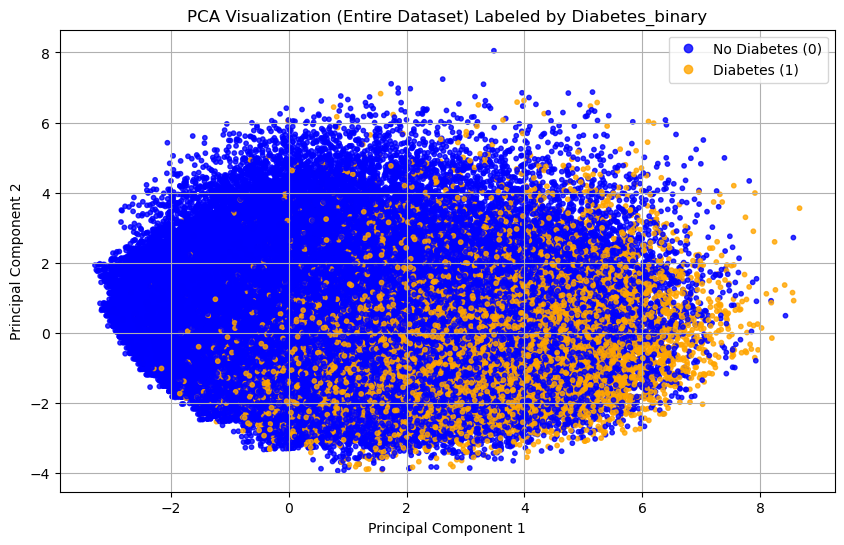

In [28]:
#Let's run PCA on the entire dataset
#Extract features and labels
#Only keep the relevant features
X = data.drop(columns=["Diabetes_binary"])
#Extract labels 
labels = data["Diabetes_binary"]

#Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

#Plot PCA results
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']  
scatter = plt.scatter(
    pca_result[:, 0], 
    pca_result[:, 1], 
    c=labels, 
    cmap=ListedColormap(colors), 
    s=10, 
    alpha=0.8
)

plt.title('PCA Visualization (Entire Dataset) Labeled by Diabetes_binary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid()
plt.show()

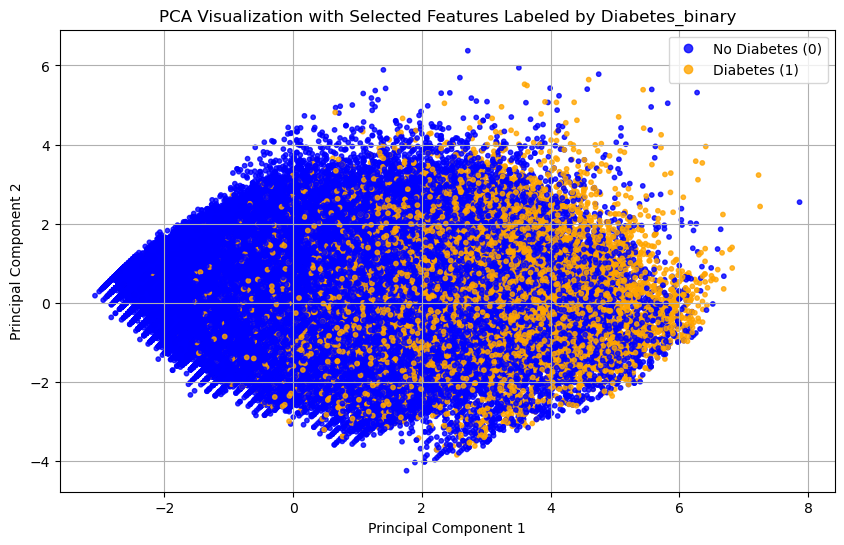

In [25]:
#Let's run PCA only on our selected features for the diabetes dataset
#Define selected features from EDA
selected_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 
                     'PhysActivity', 'DiffWalk', 'BMI', 'GenHlth', 'Age', 'Income']

#Extract selected features and labels
X_selected = data[selected_features]
labels = data["Diabetes_binary"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

#Run PCA
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(X_scaled)

#Plot PCA
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange'] 
scatter = plt.scatter(
    pca_result[:, 0], 
    pca_result[:, 1], 
    c=labels, 
    cmap=ListedColormap(colors), 
    s=10, 
    alpha=0.8
)

plt.title('PCA Visualization with Selected Features Labeled by Diabetes_binary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid()
plt.show()

C:\Users\Brian\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


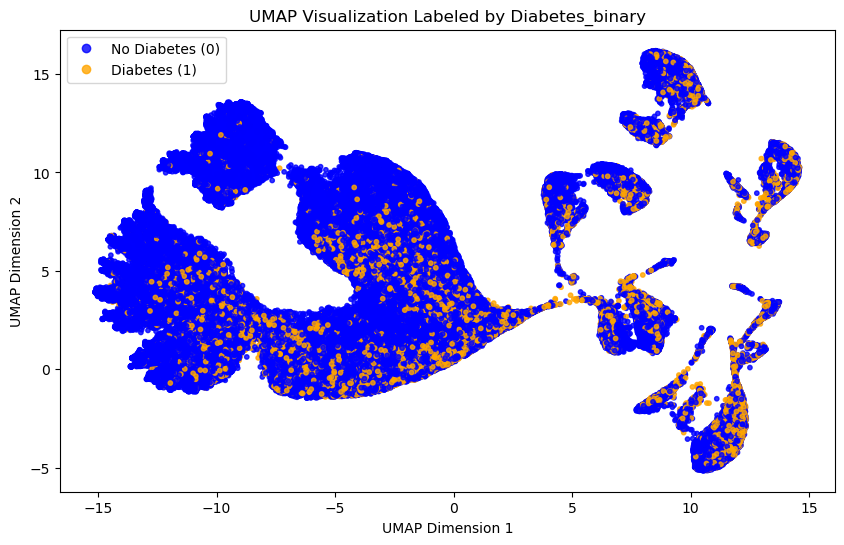

In [23]:
import umap
import matplotlib.pyplot as plt

#Extract data and labels
X = data.drop(columns=["Diabetes_binary"]) 
labels = data["Diabetes_binary"]  

#Run UMAP 2 components
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(X)

#Plot UMAP
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']  
scatter = plt.scatter(
    umap_result[:, 0], 
    umap_result[:, 1], 
    c=labels, 
    cmap=plt.matplotlib.colors.ListedColormap(colors), 
    s=10, 
    alpha=0.8
)
plt.title('UMAP Visualization Labeled by Diabetes_binary')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()

C:\Users\Brian\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


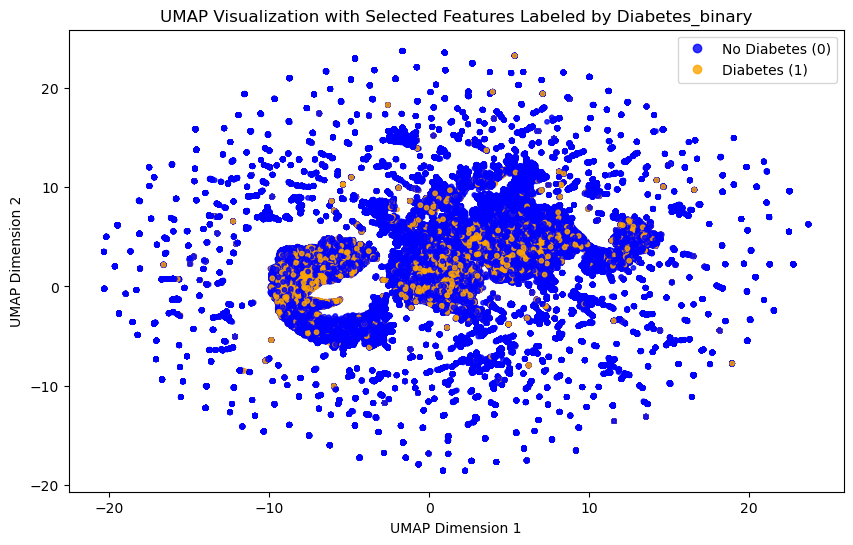

In [24]:
#Let's try UMAP on the reduced dataset
import umap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Define selected features from EDA
selected_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 
                     'PhysActivity', 'DiffWalk', 'BMI', 'GenHlth', 'Age', 'Income']

#Extract selected features and labels
X_selected = data[selected_features] 
labels = data["Diabetes_binary"] 

#Run UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(X_selected)

#Plot UMAP
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange']  
scatter = plt.scatter(
    umap_result[:, 0], 
    umap_result[:, 1], 
    c=labels, 
    cmap=ListedColormap(colors), 
    s=10, 
    alpha=0.8
)
plt.title('UMAP Visualization with Selected Features Labeled by Diabetes_binary')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(handles=scatter.legend_elements()[0], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()

In [5]:
#Double check reduced dataset features and dimensions
selected_features = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'DiffWalk', 'BMI', 'GenHlth', 'Age', 'Income']

X = data[selected_features]
y = data['Diabetes_binary']

X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 10) (202944,)
(50736, 10) (50736,)


In [6]:
#XGBoost model for feature importances
xgb_classifier = XGBClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_classifier.fit(X_train, y_train)
feature_importances = xgb_classifier.feature_importances_

#Dataframe for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

#Select top 10 features
top_10_features = importance_df['Feature'].head(10).tolist()
selected_data = data[top_10_features + ['Diabetes_binary']]
selected_data.to_csv('diabetes_reduced_dataset.csv', index=False)

In [13]:
#Let's bulk run these models and determine which one has the highest initial accuracy on the test set 
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    
    #Fit the model and make predictions 
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #Evaluate training set performance
    #Accuracy
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    #F1Score
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') 
    #Precision
    model_train_precision = precision_score(y_train, y_train_pred)
    #Recall
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    #Evaluate test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred) 
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')


Logisitic Regression
Model performance for Training set
- Accuracy: 0.8626
- F1 score: 0.8275
- Precision: 0.5302
- Recall: 0.1462
- Roc Auc Score: 0.5626
----------------------------------
Model performance for Test set
- Accuracy: 0.8650
- F1 score: 0.8312
- Precision: 0.5372
- Recall: 0.1536
- Roc Auc Score: 0.5662


Decision Tree
Model performance for Training set
- Accuracy: 0.9342
- F1 score: 0.9270
- Precision: 0.9413
- Recall: 0.5643
- Roc Auc Score: 0.7793
----------------------------------
Model performance for Test set
- Accuracy: 0.8325
- F1 score: 0.8196
- Precision: 0.3463
- Recall: 0.2420
- Roc Auc Score: 0.5844


Random Forest
Model performance for Training set
- Accuracy: 0.9342
- F1 score: 0.9290
- Precision: 0.8829
- Recall: 0.6098
- Roc Auc Score: 0.7983
----------------------------------
Model performance for Test set
- Accuracy: 0.8445
- F1 score: 0.8273
- Precision: 0.3933
- Recall: 0.2347
- Roc Auc Score: 0.5884


Gradient Boost
Model performance for Training se